In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

In [5]:
df=pd.read_csv("/content/insurance_data.csv")
df.head()
df=pd.DataFrame(df)

<Axes: >

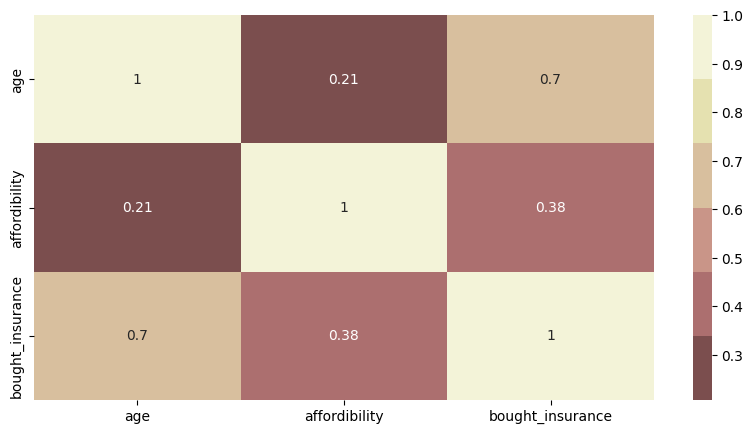

In [27]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap=sns.color_palette("pink"))

In [9]:
from sklearn.model_selection import train_test_split
x=df.drop(["bought_insurance"],axis=1)
y=df.bought_insurance
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age']/100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age']/100

In [12]:
model=keras.Sequential([
    keras.layers.Dense(1,input_shape=(2,),activation='sigmoid',kernel_initializer='ones',bias_initializer='zeros')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
history=model.fit(X_train_scaled,Y_train,epochs=5000,verbose=0)

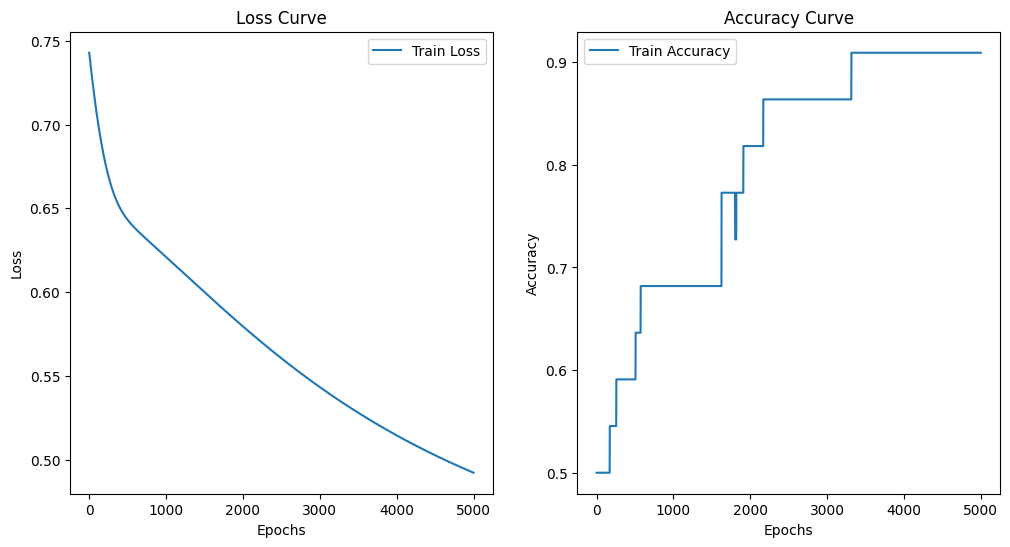

In [18]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Train Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [21]:
model.evaluate(X_test_scaled,Y_test)
X_test_scaled
model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 0.2647
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[0.81626713],
       [0.75767535],
       [0.8236742 ],
       [0.18819511],
       [0.38559142],
       [0.1959822 ]], dtype=float32)

In [22]:
coef, intercept = model.get_weights()
coef, intercept

(array([[5.0183086],
        [1.1966312]], dtype=float32),
 array([-2.766541], dtype=float32))